## Data files:
* Part 1: Exploratory Data Analysis - https://raw.githubusercontent.com/vjavaly/Baruch-CIS-STA-3920/main/data/white_wine_quality.csv
* Part 2: Data Preparation - https://raw.githubusercontent.com/vjavaly/Baruch-CIS-STA-3920/main/data/shoppers.csv

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 10/20/23 13:59:58


## Part 1: Exploratory Data Analysis

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data file (white_wine_quality.csv) into a dataframe
#  NOTE: field separator is ';'
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-STA-3920/main/data/white_wine_quality.csv', sep=';')

### Examine data

In [4]:
# Display dataframe shape
df.shape

(4898, 12)

In [5]:
# Display first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Generate summary statistics on data

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Generate insights on the dependent variable
#### Dependent  variable is quality

In [7]:
# Display the distinct classes
distinct_classes = df["quality"].unique()
print(distinct_classes)

[6 5 7 8 4 3 9]


In [8]:
# Display the distribution counts for each class
distribution_counts = df["quality"].value_counts()
print(distribution_counts)

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


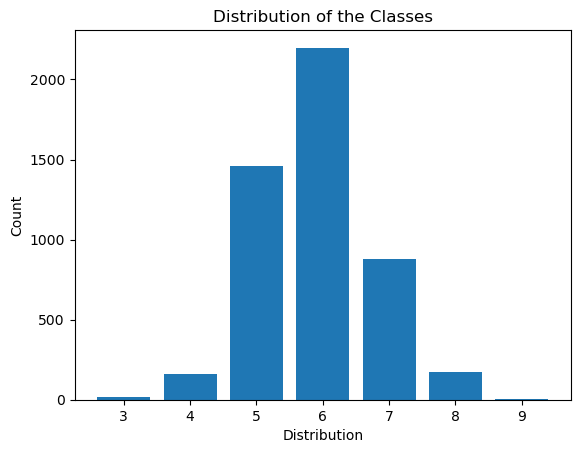

In [9]:
# Graph (i.e. bar graph) the distribution of the classes
distribution_counts = df["quality"].value_counts()
plt.bar(distribution_counts.index, distribution_counts.values)
plt.xlabel("Distribution")
plt.ylabel("Count")
plt.title("Distribution of the Classes")
plt.show()

### Display the correlation matrix for all variables

In [10]:
correlation_matrix = df.corr(numeric_only=True).round(2)
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.02         0.29   
volatile acidity              -0.02              1.00        -0.15   
citric acid                    0.29             -0.15         1.00   
residual sugar                 0.09              0.06         0.09   
chlorides                      0.02              0.07         0.11   
free sulfur dioxide           -0.05             -0.10         0.09   
total sulfur dioxide           0.09              0.09         0.12   
density                        0.27              0.03         0.15   
pH                            -0.43             -0.03        -0.16   
sulphates                     -0.02             -0.04         0.06   
alcohol                       -0.12              0.07        -0.08   
quality                       -0.11             -0.19        -0.01   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

## Part 2: Data Preparation

### NOTE: Final dataframe must be ready for model training (i.e. all numeric and scaled values)

### Import libraries

In [11]:
from sklearn.impute import SimpleImputer             # for handling missing data
from sklearn.preprocessing import LabelEncoder       # for encoding label data
from sklearn.preprocessing import StandardScaler     # for standardizing the data

### Load data
* Independent variables: Region, Age, Income
* Dependent variable: Online_Shopper

In [12]:
# Read data file (shoppers.csv) into a dataframe
df2=pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-STA-3920/main/data/shoppers.csv')

### Examine data

In [13]:
# Display dataframe
df2.head()

,Region,Age,Income,Online_Shopper
0,India,49.0,NaN,No
1,Brazil,32.0,57600.0,Yes
2,USA,NaN,NaN,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


### Identify missing values

In [14]:
df2.isnull().sum()

Region            0
Age               3
Income            4
Online_Shopper    0
dtype: int64

### Impute missing values

#### Use the SimpleImputer to replace ALL missing values

In [15]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy = 'mean')
df2["Age"]= imp_mean.fit_transform(df2[['Age']])
df2["Income"]= imp_mean.fit_transform(df2[['Income']])

### Recheck missing 


In [16]:
df2.isnull().sum()

Region            0
Age               0
Income            0
Online_Shopper    0
dtype: int64

### Display updated dataframe

In [17]:
print(df2)

   Region        Age   Income Online_Shopper
0   India  49.000000  73000.0             No
1  Brazil  32.000000  57600.0            Yes
2     USA  45.285714  73000.0             No
3  Brazil  43.000000  73200.0             No
4     USA  45.000000  73000.0            Yes
5   India  40.000000  69600.0            Yes
6  Brazil  45.285714  62400.0             No
7   India  53.000000  94800.0            Yes
8     USA  55.000000  73000.0             No
9   India  45.285714  80400.0            Yes


### Generate one-hot encodings for Region column

In [18]:
df2 = pd.get_dummies(df2, columns=['Region'])

### Encode labels

In [19]:
# Encode Online Shopper column
label_encoder = LabelEncoder()
df2['Online_Shopper'] = label_encoder.fit_transform(df2['Online_Shopper'])

### Standardize independent variables

In [20]:
scaler = StandardScaler()
df2[['Age', 'Income']] = scaler.fit_transform(df2[['Age', 'Income']])

### Display entire final dataframe

In [21]:
df2

,Age,Income,Online_Shopper,Region_Brazil,Region_India,Region_USA
0,0.604586,0.000000,0,False,True,False
1,-2.162557,-1.631371,1,True,False,False
2,0.000000,0.000000,0,False,False,True
3,-0.372053,0.021187,0,True,False,False
4,-0.046507,0.000000,1,False,False,True
5,-0.860372,-0.360173,1,False,True,False
6,0.000000,-1.122891,0,True,False,False
7,1.255678,2.309343,1,False,True,False
8,1.581224,0.000000,0,False,False,True
9,0.000000,0.783905,1,False,True,False
